In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from config import ROOT_DIR

In [2]:
df = pd.read_csv(ROOT_DIR + "/data/processed/lichess_db_standard_rated_2017-10.csv")

In [3]:
df.head()

,Event,WhiteElo,BlackElo,TimeControl,Result,MeanElo,EloDiff,BaseTime,IncrementTime,ZeroIncrementTime,ResultEncoded,WhiteWin,BlackWin,Draw,times_in_second,GameDuration,DrawEventProb,WhiteWinEventProb,BlackWinEventProb
0,Rated Classical game,1624,1721,600+3,1-0,1672.5,-97,600,3,0,0,1,0,0,"[600, 600, 599, 599, 600, 599, 602, 600, 602, ...",1059,0.033094,0.491905,0.475001
1,Rated Blitz tournament,1582,1472,180+2,0-1,1527.0,110,180,2,0,1,0,1,0,"[180, 180, 180, 180, 181, 180, 183, 180, 184, ...",363,0.044876,0.492335,0.462789
2,Rated Classical game,2252,1938,900+14,1/2-1/2,2095.0,314,900,14,0,2,0,0,1,"[900, 900, 897, 897, 910, 903, 924, 915, 928, ...",3328,0.033094,0.491905,0.475001
3,Rated Classical game,1880,1634,600+0,0-1,1757.0,246,600,0,1,1,0,1,0,"[600, 600, 598, 599, 597, 597, 595, 595, 594, ...",1058,0.033094,0.491905,0.475001
4,Rated Classical game,1983,1912,600+0,1-0,1947.5,71,600,0,1,0,1,0,0,"[600, 600, 598, 596, 596, 593, 593, 590, 587, ...",505,0.033094,0.491905,0.475001


In [11]:
data = df[(df["GameDuration"] > 0) & (df["GameDuration"] < 4000)].copy()

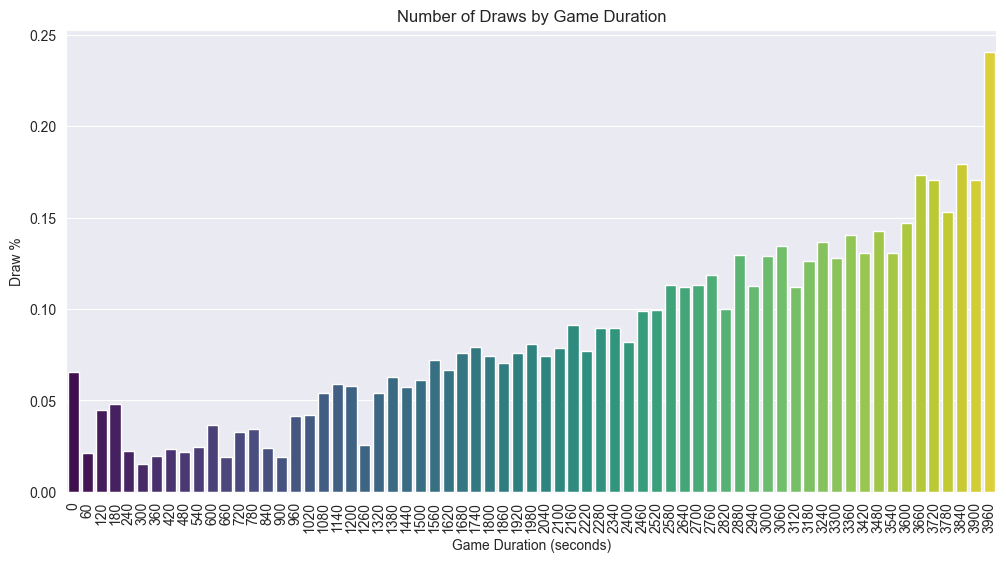

In [15]:
bin_size = 60

bins = np.arange(0, data["GameDuration"].max() + bin_size, bin_size)
data["duration_bin"] = pd.cut(data["GameDuration"], bins, labels=bins[:-1])

total_games = data["duration_bin"].value_counts().reset_index()
draw_counts = data[data["Draw"] == 1]["duration_bin"].value_counts().reset_index()
draw_counts["count"] /= total_games["count"]


plt.figure(figsize=(12, 6))
sns.barplot(x="duration_bin", y="count", hue="duration_bin", data=draw_counts, dodge=False, palette="viridis", legend=False)
plt.xlabel("Game Duration (seconds)")
plt.ylabel("Draw %")
plt.title("Number of Draws by Game Duration")
plt.xticks(rotation=90)
plt.show()

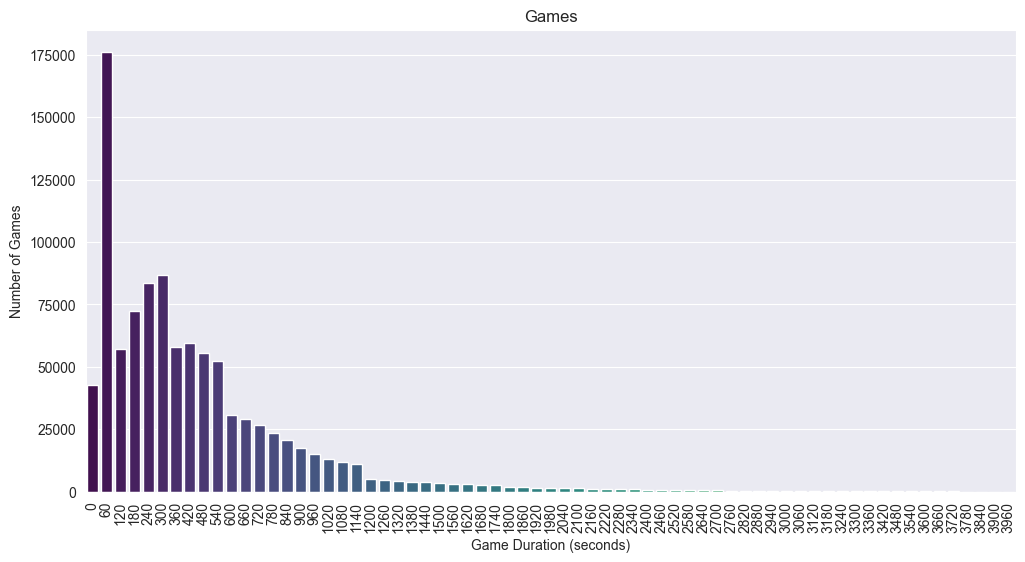

In [16]:
total_games = data["duration_bin"].value_counts().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="duration_bin", y="count", hue="duration_bin", data=total_games, dodge=False, palette="viridis", legend=False)
plt.xlabel("Game Duration (seconds)")
plt.ylabel("Number of Games")
plt.title("Games")
plt.xticks(rotation=90)
plt.show()